<a href="https://colab.research.google.com/github/yuliiabosher/Fiber-optic-project/blob/statistical_analysis/european_fibre_optic_data_clean_and_load.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Fibre optic data - European statistical data.
Load data and clean

This notebook contains code to load data provided by the European Commission about broadband connectivity and availability in 27 EU states and the UK. The data will be used to compare fibre optic coverage in the UK with that in key european countries. The data covers several years and also provides a split between rural and urban areas.

After loading the data, there is code to show some high level summative and descriptive stats

Finally there is a function that calculates year on year growth using the yearly % figures

Read the data files - location of the files should be updated based on your environment EC Broadband coverage in Europe data file available from https://digital-strategy.ec.europa.eu/en/library/digital-decade-2024-broadband-coverage-europe-2023

Code checks files exist in specified location

NB - currently I have downloaded the excel spreadsheet from the link above and saved the last 2 sheets as csv files

sheet **data** - save as EUROPE_FIBRE_HH

sheet **data%** - save as EUROPE_FIBRE

In [1]:
# Import and alias the necessary libraries
import pandas as pd
import os.path
import errno

#mount google drive
from google.colab import drive
drive.mount('/content/drive')

#############
# EC broadband data file available from https://digital-strategy.ec.europa.eu/en/library/digital-decade-2024-broadband-coverage-europe-2023
# save the last sheet in the spreadsheet as .csv and name EUROPE_FIBRE.csv
# This path should be set to the location of the file
#############
fileEuropeData = '/content/drive/MyDrive/Colab/EUROPE_FIBRE.csv'
fileEuropeHouseholds = '/content/drive/MyDrive/Colab/EUROPE_FIBRE_HH.csv'

#fileEuropeData = 'd:/Users/Sharon/Documents/College/data/EUROPE_FIBRE.csv'
#fileEuropeHouseholds = 'd:/Users/Sharon/Documents/College/data/EUROPE_FIBRE_HH.csv'
#############
# Check we can find the file required, and read it into a pandas dataframe
# show the shape of the dataframe
#############
if os.path.exists(fileEuropeData) :
    print("Reading Europe fibre data.....")
    dfEurope = pd.read_csv(fileEuropeData)
else:
    raise FileNotFoundError(errno.ENOENT, os.strerror(errno.ENOENT), fileEuropeData)
print("Europe fibre file data shape:", dfEurope.shape)

if os.path.exists(fileEuropeHouseholds) :
    print("Reading Europe fibre data (households).....")
    dfEuropeHH = pd.read_csv(fileEuropeHouseholds)
else:
    raise FileNotFoundError(errno.ENOENT, os.strerror(errno.ENOENT), fileEuropeHouseholds)
print("Europe fibre file data (households) shape:", dfEuropeHH.shape)

Mounted at /content/drive
Reading Europe fibre data.....
Europe fibre file data shape: (1650, 16)
Reading Europe fibre data (households).....
Europe fibre file data (households) shape: (1650, 15)


The data fields holding the values for each year require some cleaning.

This is done for both dataframes -
dfEurope and dfEuropeHH

1. The % and absolute values are loaded as strings because they contain commas and % signs. There are also some dashes (-) and spaces.
2. The column called Geography level is renamed to URClass to reflect Urban/Rural values

The resulting cleaned dataframes are named

dfEuropeClean

dfEuropeCleanHH

In [2]:
###DEFINE FUNCTIONS FOR CLEANING THE FILE
#fn_clean_years removed % sign and changes datatype to float
#fn_change_col_name will change any column name in any dataframe


def fn_clean_years(thisdf, thiscol):
  #check column is still a string
  if thisdf[thiscol].dtype == 'object':
    #check for dashes -
    thisdf[thiscol] = thisdf[thiscol].str.replace('-', '')
    #convert the yearly value to a float - first remove the % sign
    thisdf[thiscol] = thisdf[thiscol].str.replace('%', '')#.astype(float)
    #check if there's a comma and remove those
    thisdf[thiscol] = thisdf[thiscol].str.replace(',', '')#.astype(float)
    #check for blanks
    thisdf[thiscol] = thisdf[thiscol].str.replace(' ', '')#.astype(float)
    #finally replace empty strings with None
    thisdf[thiscol] = thisdf[thiscol].replace('', None)
    #now change the datatype of the column
    #thisdf.astype({thiscol: 'float'}).dtypes
    thisdf[thiscol] = thisdf[thiscol].astype(float)
  return thisdf

def fn_change_col_name(thisdf, oldname, newname):
  #change the name of the geography column to URClass
  thisdf.rename(columns={oldname: newname}, inplace=True)
  return thisdf

In [3]:
#clean and prepare data
#we need to rename the Geography level URClass cos it didn't seemto like the space in the name
#then for each of the year columns strip the % sign from the value and change it from a string to a float
dfEuropeClean = fn_change_col_name(dfEurope, 'Geography level', 'URClass')
dfEuropeClean = fn_clean_years(dfEuropeClean, '2023')
dfEuropeClean = fn_clean_years(dfEuropeClean, '2022')
dfEuropeClean = fn_clean_years(dfEuropeClean, '2021')
dfEuropeClean = fn_clean_years(dfEuropeClean, '2020')
dfEuropeClean = fn_clean_years(dfEuropeClean, '2019')
dfEuropeClean = fn_clean_years(dfEuropeClean, '2018')
print(dfEuropeClean.head())

#now do the same for the households data
#in this case, we need to strip a , from the year columns and change it to a float
dfEuropeCleanHH = fn_change_col_name(dfEuropeHH, 'Geography level', 'URClass')
dfEuropeCleanHH = fn_clean_years(dfEuropeCleanHH, '2023')
dfEuropeCleanHH = fn_clean_years(dfEuropeCleanHH, '2022')
dfEuropeCleanHH = fn_clean_years(dfEuropeCleanHH, '2021')
dfEuropeCleanHH = fn_clean_years(dfEuropeCleanHH, '2020')
dfEuropeCleanHH = fn_clean_years(dfEuropeCleanHH, '2019')
dfEuropeCleanHH = fn_clean_years(dfEuropeCleanHH, '2018')
print(dfEuropeCleanHH.head())

   Country                        Metric URClass             Unit  \
0  Austria                     Land area   Total       km squared   
1  Austria                    Population   Total              ###   
2  Austria                    Households   Total              ###   
3  Austria   Broadband coverage (>2Mbps)   Total  % of Households   
4  Austria  Broadband coverage (>30Mbps)   Total  % of Households   

           2013          2014          2015          2016          2017  \
0    8387900.0%    8387900.0%    8387900.0%    8387900.0%    8387900.0%   
1  844301800.0%  845186000.0%  850688900.0%  857626100.0%  869007600.0%   
2  367087600.0%  373890627.2%  381326121.0%  385514998.2%  390333256.0%   
3         98.6%         98.4%         98.0%         98.1%         97.9%   
4         55.6%         60.3%         65.2%         67.3%         71.3%   

          2018         2019         2020         2021         2022  \
0    8387900.0    8387900.0    8387900.0    8392700.0    8392700

Reduce the columns to just show those for 2018 onwards, as well as the country, the metric(FTTP etc) and the URClass (Rural or Total)

In [4]:
europeCols = ['Country','Metric','URClass', 'Unit','2018','2019','2020','2021','2022','2023']
dfEuropeClean = dfEuropeClean[europeCols]
print(dfEuropeClean.head())

europeHHCols = ['Country','Metric','URClass','Unit','2018','2019','2020','2021','2022','2023']
dfEuropeCleanHH = dfEuropeCleanHH[europeCols]
print(dfEuropeCleanHH.head())

   Country                        Metric URClass             Unit  \
0  Austria                     Land area   Total       km squared   
1  Austria                    Population   Total              ###   
2  Austria                    Households   Total              ###   
3  Austria   Broadband coverage (>2Mbps)   Total  % of Households   
4  Austria  Broadband coverage (>30Mbps)   Total  % of Households   

          2018         2019         2020         2021         2022  \
0    8387900.0    8387900.0    8387900.0    8392700.0    8392700.0   
1  877286500.0  885877500.0  890106400.0  893266400.0  897892900.0   
2  393553380.2  388331200.0  391892900.0  395914300.0  399505000.0   
3         98.1         98.2         98.6          NaN          NaN   
4         72.4         78.8         86.6         93.3         94.8   

          2023  
0    8392700.0  
1  910477200.0  
2  403308000.0  
3          NaN  
4         94.2  
   Country                        Metric URClass        Unit  

Now rename the value fields in each dataset so when merged they have sensible names

in the percentage dataframe
2018 becomes 2018% etc

in the no of households dataframe
2018 becomes 2018HH etc

Then merge the two dataframes on Country/Metric/URClass

In [5]:
#rename year columns in each dataset
dfEuropeClean = fn_change_col_name(dfEuropeClean, '2018', '2018%')
dfEuropeClean = fn_change_col_name(dfEuropeClean, '2019', '2019%')
dfEuropeClean = fn_change_col_name(dfEuropeClean, '2020', '2020%')
dfEuropeClean = fn_change_col_name(dfEuropeClean, '2021', '2021%')
dfEuropeClean = fn_change_col_name(dfEuropeClean, '2022', '2022%')
dfEuropeClean = fn_change_col_name(dfEuropeClean, '2023', '2023%')

dfEuropeCleanHH = fn_change_col_name(dfEuropeCleanHH, '2018', '2018HH')
dfEuropeCleanHH = fn_change_col_name(dfEuropeCleanHH, '2019', '2019HH')
dfEuropeCleanHH = fn_change_col_name(dfEuropeCleanHH, '2020', '2020HH')
dfEuropeCleanHH = fn_change_col_name(dfEuropeCleanHH, '2021', '2021HH')
dfEuropeCleanHH = fn_change_col_name(dfEuropeCleanHH, '2022', '2022HH')
dfEuropeCleanHH = fn_change_col_name(dfEuropeCleanHH, '2023', '2023HH')

##merge the two datasets
colslist = ['Country', 'Metric','URClass']
dfFinal = pd.merge(dfEuropeClean,dfEuropeCleanHH,on=colslist, how='inner')



<ipython-input-2-5281cde9183b>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thisdf.rename(columns={oldname: newname}, inplace=True)


Finally, lets only return those rows for the metric FTTP - this means we will have only values for fibre to the premises availability

The resulting dataframe dfEuropeCleanFTTP, has the following structure

Country - name of the country

Metric - now always FTTP

URClass - Total (ie rural and urban) or Rural

2018% - percentage of households with access to FTTP in 2018

2018HH - absolute number of households with access to FTTP in 2018

2019% - percentage of households with access to FTTP in 2019

2019HH - absolute number of households with access to FTTP in 2019

2020% - percentage of households with access to FTTP in 2020

2020HH - absolute number of households with access to FTTP in 2020

2021% - percentage of households with access to FTTP in 2021

2021HH - absolute number of households with access to FTTP in 2021

2022% - percentage of households with access to FTTP in 2022

2022HH - absolute number of households with access to FTTP in 2022

2023% - percentage of households with access to FTTP in 2023

2023HH - absolute number of households with access to FTTP in 2023



In [6]:
###DEFINE FUNCTION TO FILTER DATASET BY METRIC

def fn_filter_by_metric(thisdf, thismetric):
  #return a new dataset which only contains specified metric
  return thisdf.query('Metric == "' + thismetric + '"')

#now run this function to get only those rows where Metric = FTTP
#this will give us all the rows for full fibre availability
dfEuropeCleanFTTP = fn_filter_by_metric(dfFinal, 'FTTP')
dfEuropeCleanFTTP.head()

#drop summary rows so only the countries are left
dfEuropeCleanFTTPDropEU = dfEuropeCleanFTTP.drop(dfEuropeCleanFTTP[dfEuropeCleanFTTP['Country'] == 'EU27'].index)
dfEuropeCleanFTTP = dfEuropeCleanFTTPDropEU.drop(dfEuropeCleanFTTPDropEU[dfEuropeCleanFTTPDropEU['Country'] == 'EU28'].index)



Display a visualisation of the number of households with/without FTTP per year per country

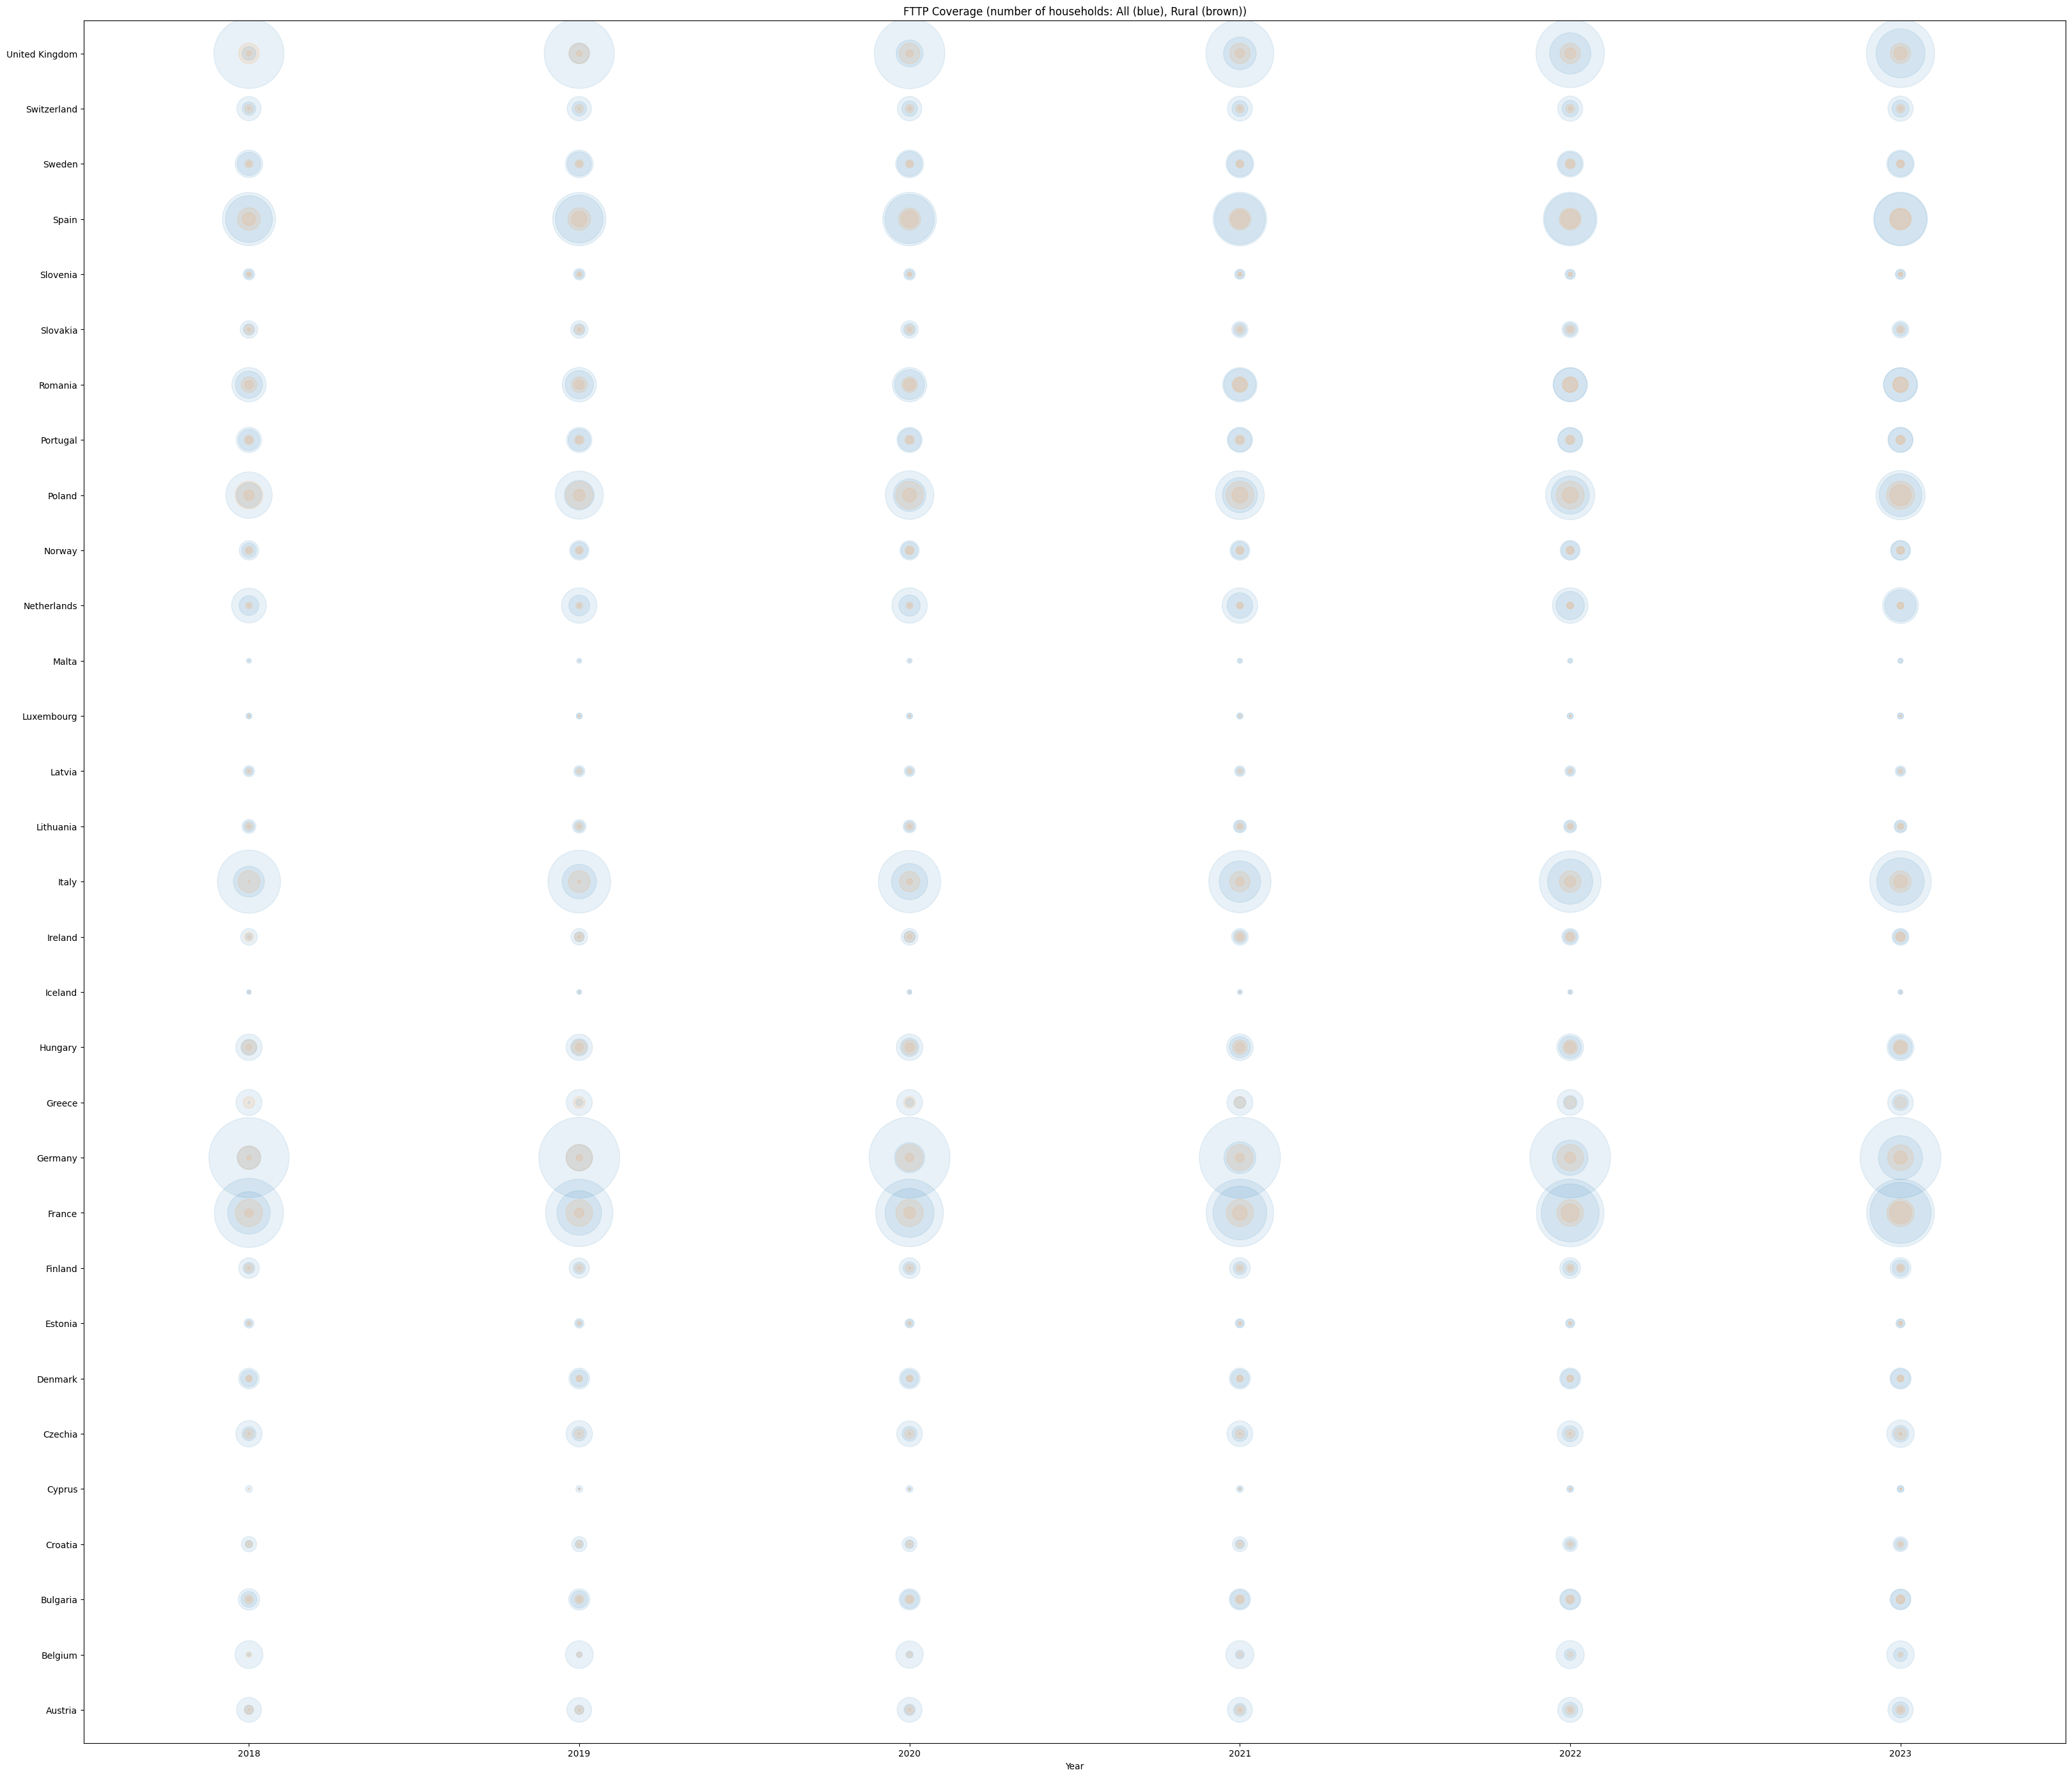

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.copy_on_write = True
plot_for_all_countries = True


####
# Define a function that will create a dataframe for a country (thiscountry) and a URClass (thisurclass)
# including the number of households in that country with that URClass, and the number of households of that URClass with FTTP
####
def get_dataframe_for_country_urclass(thisdf, thiscountry, thisurclass):
   dfCountry=thisdf.query('Country == "' + thiscountry + '"')
   dfCountry=dfCountry.query('URClass == "' + thisurclass + '"')
   dfCountry=dfCountry.query('Metric == "Households" | Metric =="FTTP"')
   dfCountry.reset_index(drop=True, inplace=True)
   dfCountryYears=dfCountry[["2018","2019","2020","2021","2022","2023"]]
   dfCountryYears.loc[2] = (dfCountryYears.iloc[0]/5000)
   dfCountryYears.loc[3] = (dfCountryYears.iloc[1]/5000)
   dfCountryYears=dfCountryYears.iloc[2:4,:]
   dfCountryYears["Country"]=[thiscountry,thiscountry]
   dfCountryYears["URClass"]=[thisurclass,thisurclass]
   return dfCountryYears

######
# Create a dataframe based on the dfEuropeCleanHH data
######
dfMyEuropeClean = dfEuropeCleanHH
dfMyEuropeClean = dfMyEuropeClean.drop(dfMyEuropeClean[dfMyEuropeClean['Country'] == 'EU27'].index)
dfMyEuropeClean = dfMyEuropeClean.drop(dfMyEuropeClean[dfMyEuropeClean['Country'] == 'EU28'].index)
dfMyEuropeClean = fn_change_col_name(dfMyEuropeClean, '2018HH', '2018')
dfMyEuropeClean = fn_change_col_name(dfMyEuropeClean, '2019HH', '2019')
dfMyEuropeClean = fn_change_col_name(dfMyEuropeClean, '2020HH', '2020')
dfMyEuropeClean = fn_change_col_name(dfMyEuropeClean, '2021HH', '2021')
dfMyEuropeClean = fn_change_col_name(dfMyEuropeClean, '2022HH', '2022')
dfMyEuropeClean = fn_change_col_name(dfMyEuropeClean, '2023HH', '2023')

######
# Define which countries to plot
######
countries=dfMyEuropeClean['Country'].unique()

######
# Use the defined above to create a dataframe for All households in multiple countries including the number of households with FTTP, and the total number of households
######
if plot_for_all_countries == True:
  dfMyData = pd.DataFrame()
  for country in countries:
    dfCountryData=get_dataframe_for_country_urclass(dfMyEuropeClean, country, 'Total')
    dfMyData=pd.concat([dfMyData,dfCountryData])
    xmargin=0.1
    ymargin=0.02
    xfigsize=40
    yfigsize=35
else:
  dfFranceData =get_dataframe_for_country_urclass(dfMyEuropeClean, 'France', 'Total')
  dfGermanyData =get_dataframe_for_country_urclass(dfMyEuropeClean, 'Germany', 'Total')
  dfUKData =get_dataframe_for_country_urclass(dfMyEuropeClean, 'United Kingdom', 'Total')
  listData=[dfFranceData, dfGermanyData, dfUKData]
  dfMyData=pd.concat(listData)
  xmargin=0.1
  ymargin=0.25
  xfigsize=20
  yfigsize=8

######
# Rearrange All households data, and plot
######
dfMyData=dfMyData.melt(id_vars=["Country", 'URClass'],value_vars=['Country','2018','2019','2020','2021','2022','2023'])
dfMyData["value"] = pd.to_numeric(dfMyData["value"])
dfMyData["variable"] = pd.to_numeric(dfMyData["variable"])
fig,axes=plt.subplots(1,1,figsize=(xfigsize,yfigsize))
axes.scatter(dfMyData["variable"], dfMyData["Country"], s=dfMyData ["value"], alpha=0.1, axes=axes)

######
# Use the defined above to create a dataframe for Rural households in multiple countries including the number of households with FTTP, and the total number of households
######
if plot_for_all_countries == True:
  #Get data for all countries
  dfMyRuralData = pd.DataFrame()
  for country in countries:
    dfRuralCountryData=get_dataframe_for_country_urclass(dfMyEuropeClean, country, 'Rural')
    dfMyRuralData=pd.concat([dfMyRuralData,dfRuralCountryData])
else:
  #Do Just France, Germany and UK
  dfFranceRuralData =get_dataframe_for_country_urclass(dfMyEuropeClean, 'France', 'Rural')
  dfGermanyRuralData =get_dataframe_for_country_urclass(dfMyEuropeClean, 'Germany', 'Rural')
  dfUKRuralData =get_dataframe_for_country_urclass(dfMyEuropeClean, 'United Kingdom', 'Rural')
  listRuralData=[dfFranceRuralData, dfGermanyRuralData, dfUKRuralData]
  dfMyRuralData=pd.concat(listRuralData)

######
# Rearrange Rural households data, and plot
######
dfMyRuralData=dfMyRuralData.melt(id_vars=["Country", 'URClass'],value_vars=['Country','2018','2019','2020','2021','2022','2023'])
dfMyRuralData["value"] = pd.to_numeric(dfMyRuralData["value"])
dfMyRuralData["variable"] = pd.to_numeric(dfMyRuralData["variable"])
axes.scatter(dfMyRuralData["variable"], dfMyRuralData["Country"], s=dfMyRuralData ["value"], alpha=0.1)
axes.set_xlabel('Year')
axes.margins(x=xmargin,y=ymargin)
axes.set_title('FTTP Coverage (number of households: All (blue), Rural (brown))')
plt.show()


Look at the countries and their FTTP coverage

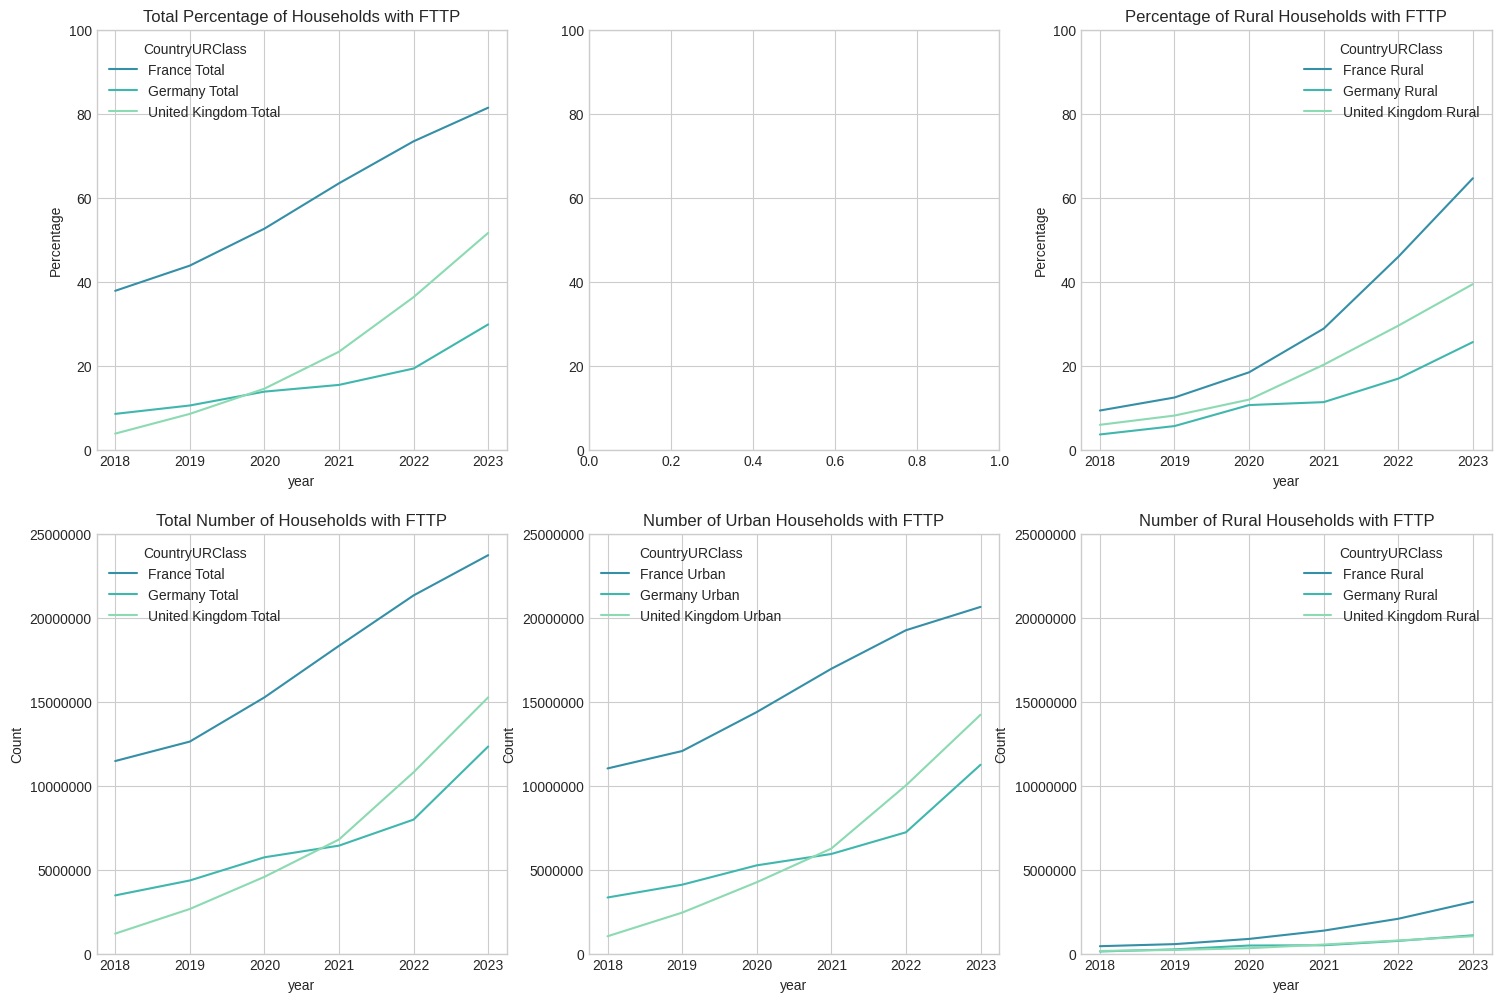

AttributeError: 'numpy.ndarray' object has no attribute 'set'

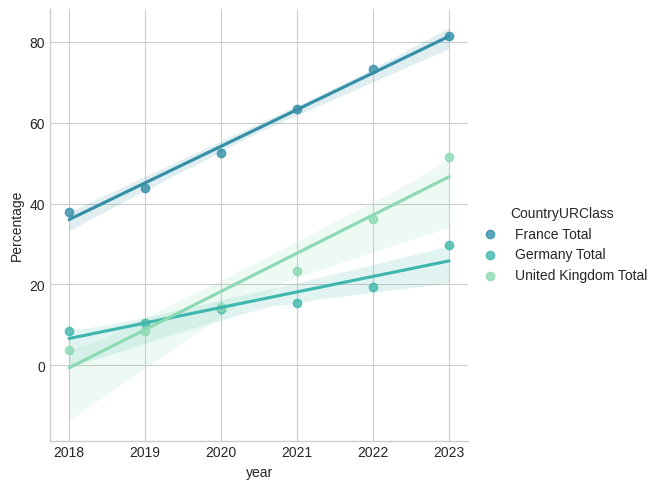

In [ ]:

# Import and alias the necessary libraries
#!pip install mplcursors
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mplcursors import cursor

percentage_columns = ['Country','URClass','2018%','2019%','2020%','2021%','2022%','2023%']
dfEuropeCleanPlotPercentage=dfEuropeCleanFTTP[percentage_columns]
dfUKFranceGermanyPlotPercentage=dfEuropeCleanPlotPercentage[(dfEuropeCleanPlotPercentage['Country'] == 'France') | (dfEuropeCleanPlotPercentage['Country'] == 'Germany') | (dfEuropeCleanPlotPercentage['Country'] == 'United Kingdom')]

dfUKFranceGermanyTotalPlotPercentage=dfUKFranceGermanyPlotPercentage[(dfUKFranceGermanyPlotPercentage['URClass'] == 'Total') ].reset_index()
dfUKFranceGermanyRuralPlotPercentage=dfUKFranceGermanyPlotPercentage[(dfUKFranceGermanyPlotPercentage['URClass'] == 'Rural') ].reset_index()
#dfUKFranceGermanyUrbanPlotPercentage=pd.DataFrame({
#  'Country': ['France', 'Germany', 'United Kingdom'],
#  'URClass': ['Urban', 'Urban', 'Urban'],
#  '2018%': [(dfUKFranceGermanyTotalPlotPercentage.loc[0,'2018%'] - dfUKFranceGermanyRuralPlotPercentage.loc[0,'2018%']),(dfUKFranceGermanyTotalPlotPercentage.loc[1,'2018%'] - dfUKFranceGermanyRuralPlotPercentage.loc[1,'2018%']),(dfUKFranceGermanyTotalPlotPercentage.loc[2,'2018%'] - dfUKFranceGermanyRuralPlotPercentage.loc[2,'2018%'])],
#  '2019%': [(dfUKFranceGermanyTotalPlotPercentage.loc[0,'2019%'] - dfUKFranceGermanyRuralPlotPercentage.loc[0,'2019%']),(dfUKFranceGermanyTotalPlotPercentage.loc[1,'2019%'] - dfUKFranceGermanyRuralPlotPercentage.loc[1,'2019%']),(dfUKFranceGermanyTotalPlotPercentage.loc[2,'2019%'] - dfUKFranceGermanyRuralPlotPercentage.loc[2,'2019%'])],
#  '2020%': [(dfUKFranceGermanyTotalPlotPercentage.loc[0,'2020%'] - dfUKFranceGermanyRuralPlotPercentage.loc[0,'2020%']),(dfUKFranceGermanyTotalPlotPercentage.loc[1,'2020%'] - dfUKFranceGermanyRuralPlotPercentage.loc[1,'2020%']),(dfUKFranceGermanyTotalPlotPercentage.loc[2,'2020%'] - dfUKFranceGermanyRuralPlotPercentage.loc[2,'2020%'])],
#  '2021%': [(dfUKFranceGermanyTotalPlotPercentage.loc[0,'2021%'] - dfUKFranceGermanyRuralPlotPercentage.loc[0,'2021%']),(dfUKFranceGermanyTotalPlotPercentage.loc[1,'2021%'] - dfUKFranceGermanyRuralPlotPercentage.loc[1,'2021%']),(dfUKFranceGermanyTotalPlotPercentage.loc[2,'2021%'] - dfUKFranceGermanyRuralPlotPercentage.loc[2,'2021%'])],
#  '2022%': [(dfUKFranceGermanyTotalPlotPercentage.loc[0,'2022%'] - dfUKFranceGermanyRuralPlotPercentage.loc[0,'2022%']),(dfUKFranceGermanyTotalPlotPercentage.loc[1,'2022%'] - dfUKFranceGermanyRuralPlotPercentage.loc[1,'2022%']),(dfUKFranceGermanyTotalPlotPercentage.loc[2,'2022%'] - dfUKFranceGermanyRuralPlotPercentage.loc[2,'2022%'])],
#  '2023%': [(dfUKFranceGermanyTotalPlotPercentage.loc[0,'2023%'] - dfUKFranceGermanyRuralPlotPercentage.loc[0,'2023%']),(dfUKFranceGermanyTotalPlotPercentage.loc[1,'2023%'] - dfUKFranceGermanyRuralPlotPercentage.loc[1,'2023%']),(dfUKFranceGermanyTotalPlotPercentage.loc[2,'2023%'] - dfUKFranceGermanyRuralPlotPercentage.loc[2,'2023%'])]
#  })

#display(dfUKFranceGermanyUrbanPlotPercentage)

count_household_columns = ['Country','URClass','2018HH','2019HH','2020HH','2021HH','2022HH','2023HH']
dfEuropeCleanPlotHouseholds=dfEuropeCleanFTTP[count_household_columns]
dfUKFranceGermanyPlotHouseholds=dfEuropeCleanPlotHouseholds[(dfEuropeCleanPlotHouseholds['Country'] == 'France') | (dfEuropeCleanPlotHouseholds['Country'] == 'Germany') | (dfEuropeCleanPlotHouseholds['Country'] == 'United Kingdom')]
dfUKFranceGermanyTotalPlotHouseholds=dfUKFranceGermanyPlotHouseholds[(dfUKFranceGermanyPlotHouseholds['URClass'] == 'Total') ].reset_index()
dfUKFranceGermanyRuralPlotHouseholds=dfUKFranceGermanyPlotHouseholds[(dfUKFranceGermanyPlotHouseholds['URClass'] == 'Rural') ].reset_index()
dfUKFranceGermanyUrbanPlotHouseholds=pd.DataFrame({
  'Country': ['France', 'Germany', 'United Kingdom'],
  'URClass': ['Urban', 'Urban', 'Urban'],
  '2018HH': [(dfUKFranceGermanyTotalPlotHouseholds.loc[0,'2018HH'] - dfUKFranceGermanyRuralPlotHouseholds.loc[0,'2018HH']),(dfUKFranceGermanyTotalPlotHouseholds.loc[1,'2018HH'] - dfUKFranceGermanyRuralPlotHouseholds.loc[1,'2018HH']),(dfUKFranceGermanyTotalPlotHouseholds.loc[2,'2018HH'] - dfUKFranceGermanyRuralPlotHouseholds.loc[2,'2018HH'])],
  '2019HH': [(dfUKFranceGermanyTotalPlotHouseholds.loc[0,'2019HH'] - dfUKFranceGermanyRuralPlotHouseholds.loc[0,'2019HH']),(dfUKFranceGermanyTotalPlotHouseholds.loc[1,'2019HH'] - dfUKFranceGermanyRuralPlotHouseholds.loc[1,'2019HH']),(dfUKFranceGermanyTotalPlotHouseholds.loc[2,'2019HH'] - dfUKFranceGermanyRuralPlotHouseholds.loc[2,'2019HH'])],
  '2020HH': [(dfUKFranceGermanyTotalPlotHouseholds.loc[0,'2020HH'] - dfUKFranceGermanyRuralPlotHouseholds.loc[0,'2020HH']),(dfUKFranceGermanyTotalPlotHouseholds.loc[1,'2020HH'] - dfUKFranceGermanyRuralPlotHouseholds.loc[1,'2020HH']),(dfUKFranceGermanyTotalPlotHouseholds.loc[2,'2020HH'] - dfUKFranceGermanyRuralPlotHouseholds.loc[2,'2020HH'])],
  '2021HH': [(dfUKFranceGermanyTotalPlotHouseholds.loc[0,'2021HH'] - dfUKFranceGermanyRuralPlotHouseholds.loc[0,'2021HH']),(dfUKFranceGermanyTotalPlotHouseholds.loc[1,'2021HH'] - dfUKFranceGermanyRuralPlotHouseholds.loc[1,'2021HH']),(dfUKFranceGermanyTotalPlotHouseholds.loc[2,'2021HH'] - dfUKFranceGermanyRuralPlotHouseholds.loc[2,'2021HH'])],
  '2022HH': [(dfUKFranceGermanyTotalPlotHouseholds.loc[0,'2022HH'] - dfUKFranceGermanyRuralPlotHouseholds.loc[0,'2022HH']),(dfUKFranceGermanyTotalPlotHouseholds.loc[1,'2022HH'] - dfUKFranceGermanyRuralPlotHouseholds.loc[1,'2022HH']),(dfUKFranceGermanyTotalPlotHouseholds.loc[2,'2022HH'] - dfUKFranceGermanyRuralPlotHouseholds.loc[2,'2022HH'])],
  '2023HH': [(dfUKFranceGermanyTotalPlotHouseholds.loc[0,'2023HH'] - dfUKFranceGermanyRuralPlotHouseholds.loc[0,'2023HH']),(dfUKFranceGermanyTotalPlotHouseholds.loc[1,'2023HH'] - dfUKFranceGermanyRuralPlotHouseholds.loc[1,'2023HH']),(dfUKFranceGermanyTotalPlotHouseholds.loc[2,'2023HH'] - dfUKFranceGermanyRuralPlotHouseholds.loc[2,'2023HH'])]
  })

#display(dfUKFranceGermanyUrbanPlotPercentage)
dfUKFranceGermanyUrbanPlotHouseholds.rename(columns={'2018HH': '2018', '2019HH': '2019', '2020HH': '2020', '2021HH':'2021', '2022HH':'2022', '2023HH':'2023'}, inplace=True)
dfUKFranceGermanyRuralPlotHouseholds.rename(columns={'2018HH': '2018', '2019HH': '2019', '2020HH': '2020', '2021HH':'2021', '2022HH':'2022', '2023HH':'2023'}, inplace=True)
dfUKFranceGermanyTotalPlotHouseholds.rename(columns={'2018HH': '2018', '2019HH': '2019', '2020HH': '2020', '2021HH':'2021', '2022HH':'2022', '2023HH':'2023'}, inplace=True)
dfUKFranceGermanyTotalPlotPercentage.rename(columns={'2018%': '2018', '2019%': '2019', '2020%': '2020', '2021%':'2021', '2022%':'2022', '2023%':'2023'}, inplace=True)
dfUKFranceGermanyRuralPlotPercentage.rename(columns={'2018%': '2018', '2019%': '2019', '2020%': '2020', '2021%':'2021', '2022%':'2022', '2023%':'2023'}, inplace=True)


dfUKFranceGermanyTotalPlotPercentage=dfUKFranceGermanyTotalPlotPercentage.melt(id_vars=["Country", 'URClass'],value_vars=['Country','2018','2019','2020','2021','2022','2023'])
dfUKFranceGermanyTotalPlotPercentage['CountryURClass'] = dfUKFranceGermanyTotalPlotPercentage[['Country', 'URClass']].agg(' '.join, axis=1)
dfUKFranceGermanyRuralPlotPercentage=dfUKFranceGermanyRuralPlotPercentage.melt(id_vars=["Country", 'URClass'],value_vars=['Country','2018','2019','2020','2021','2022','2023'])
dfUKFranceGermanyRuralPlotPercentage['CountryURClass'] = dfUKFranceGermanyRuralPlotPercentage[['Country', 'URClass']].agg(' '.join, axis=1)
dfUKFranceGermanyRuralPlotHouseholds=dfUKFranceGermanyRuralPlotHouseholds.melt(id_vars=["Country", 'URClass'],value_vars=['Country','2018','2019','2020','2021','2022','2023'])
dfUKFranceGermanyRuralPlotHouseholds['CountryURClass'] = dfUKFranceGermanyRuralPlotHouseholds[['Country', 'URClass']].agg(' '.join, axis=1)
dfUKFranceGermanyTotalPlotHouseholds=dfUKFranceGermanyTotalPlotHouseholds.melt(id_vars=["Country", 'URClass'],value_vars=['Country','2018','2019','2020','2021','2022','2023'])
dfUKFranceGermanyTotalPlotHouseholds['CountryURClass'] = dfUKFranceGermanyTotalPlotHouseholds[['Country', 'URClass']].agg(' '.join, axis=1)
dfUKFranceGermanyUrbanPlotHouseholds=dfUKFranceGermanyUrbanPlotHouseholds.melt(id_vars=["Country", 'URClass'],value_vars=['Country','2018','2019','2020','2021','2022','2023'])
dfUKFranceGermanyUrbanPlotHouseholds['CountryURClass'] = dfUKFranceGermanyUrbanPlotHouseholds[['Country', 'URClass']].agg(' '.join, axis=1)

dfUKFranceGermanyRuralPlotPercentage.rename(columns={'variable': 'year', 'value': 'Percentage'}, inplace=True)
dfUKFranceGermanyTotalPlotPercentage.rename(columns={'variable': 'year', 'value': 'Percentage'}, inplace=True)
dfUKFranceGermanyRuralPlotHouseholds.rename(columns={'variable': 'year', 'value': 'Count'}, inplace=True)
dfUKFranceGermanyTotalPlotHouseholds.rename(columns={'variable': 'year', 'value': 'Count'}, inplace=True)
dfUKFranceGermanyUrbanPlotHouseholds.rename(columns={'variable': 'year', 'value': 'Count'}, inplace=True)

def convert_columns_to_numeric(dataframe, isPercentage) :
  if isPercentage:
    dataframe["Percentage"] = pd.to_numeric(dataframe["Percentage"])
  else:
    dataframe["Count"] = pd.to_numeric(dataframe["Count"])
  dataframe["year"] = pd.to_numeric(dataframe["year"])

convert_columns_to_numeric(dfUKFranceGermanyTotalPlotPercentage, True)
convert_columns_to_numeric(dfUKFranceGermanyRuralPlotPercentage, True)
convert_columns_to_numeric(dfUKFranceGermanyTotalPlotHouseholds, False)
convert_columns_to_numeric(dfUKFranceGermanyUrbanPlotHouseholds, False)
convert_columns_to_numeric(dfUKFranceGermanyRuralPlotHouseholds, False)

colors=sns.color_palette('mako')[3:6]
if True:
  fig, axes = plt.subplots(2,3, figsize=(18,12))
  axes[0,0].set(ylim=(0, 100))
  axes[0,0].set_title('Total Percentage of Households with FTTP')
  #axes[0,1].set_title('Percentage of Rural Households with FTTP')
  axes[0,1].set(ylim=(0, 100))
  axes[0,2].set(ylim=(0, 100))
  axes[0,2].set_title('Percentage of Rural Households with FTTP')
  axes[1,0].set_title('Total Number of Households with FTTP')
  axes[1,1].set_title('Number of Urban Households with FTTP')
  axes[1,2].set_title('Number of Rural Households with FTTP')
  axes[1,0].get_yaxis().get_major_formatter().set_scientific(False)
  axes[1,1].get_yaxis().get_major_formatter().set_scientific(False)
  axes[1,2].get_yaxis().get_major_formatter().set_scientific(False)
  axes[1,0].set(ylim=(0, 25000000))
  axes[1,1].set(ylim=(0, 25000000))
  axes[1,2].set(ylim=(0, 25000000))

  sns.lineplot(x='year', y='Percentage', hue='CountryURClass', palette=colors, data=dfUKFranceGermanyTotalPlotPercentage,ax=axes[0,0])
  sns.lineplot(x='year', y='Percentage', hue='CountryURClass', palette=colors, data=dfUKFranceGermanyRuralPlotPercentage, ax=axes[0,2])
  sns.lineplot(x='year', y='Count', hue='CountryURClass', palette=colors, data=dfUKFranceGermanyTotalPlotHouseholds, ax=axes[1,0])
  sns.lineplot(x='year', y='Count', hue='CountryURClass', palette=colors, data=dfUKFranceGermanyUrbanPlotHouseholds, ax=axes[1,1])
  sns.lineplot(x='year', y='Count', hue='CountryURClass', palette=colors, data=dfUKFranceGermanyRuralPlotHouseholds, ax=axes[1,2])
  cursor(hover=True)

  plt.show()
  lm = sns.lmplot(x='year', y='Percentage', hue='CountryURClass', palette=colors, data=dfUKFranceGermanyTotalPlotPercentage)
  plt.show()


if False:
  dfFranceTotalPlotPercentage=dfUKFranceGermanyTotalPlotPercentage[(dfUKFranceGermanyTotalPlotPercentage['Country'] == 'France') ]
  dfGermanyTotalPlotPercentage=dfUKFranceGermanyTotalPlotPercentage[(dfUKFranceGermanyTotalPlotPercentage['Country'] == 'Germany') ]
  dfUKTotalPlotPercentage=dfUKFranceGermanyTotalPlotPercentage[(dfUKFranceGermanyTotalPlotPercentage['Country'] == 'United Kingdom') ]
  dfFranceRuralPlotPercentage=dfUKFranceGermanyRuralPlotPercentage[(dfUKFranceGermanyRuralPlotPercentage['Country'] == 'France') ]
  dfGermanyRuralPlotPercentage=dfUKFranceGermanyRuralPlotPercentage[(dfUKFranceGermanyRuralPlotPercentage['Country'] == 'Germany') ]
  dfUKRuralPlotPercentage=dfUKFranceGermanyRuralPlotPercentage[(dfUKFranceGermanyRuralPlotPercentage['Country'] == 'United Kingdom') ]

  fig, axes = plt.subplots(2,3, figsize=(18,12))
  xlim = [2018,2035]
  axes[0,0].set(ylim=(0, 100))
  axes[0,1].set(ylim=(0, 100))
  axes[0,2].set(ylim=(0, 100))
  axes[0,0].set(xlim=(2018, 2026))
  axes[0,1].set(xlim=(2018, 2030))
  axes[0,2].set(xlim=(2018, 2045))
  axes[0,0].set_title('France: % of All Households with FTTP')
  axes[0,1].set_title('UK: % of All Households with FTTP')
  axes[0,2].set_title('Germany: % of All Households with FTTP')
  axes[1,0].set(ylim=(0, 100))
  axes[1,1].set(ylim=(0, 100))
  axes[1,2].set(ylim=(0, 100))
  axes[1,0].set(xlim=(2018, 2026))
  axes[1,1].set(xlim=(2018, 2035))
  axes[1,2].set(xlim=(2018, 2045))
  axes[1,0].set_title('France: % of Rural Households with FTTP')
  axes[1,1].set_title('UK: % of Rural Households with FTTP')
  axes[1,2].set_title('Germany: % of Rural Households with FTTP')
  sns.regplot(x='year', y='Percentage', data=dfFranceTotalPlotPercentage, truncate=False, ax=axes[0,0])
  sns.regplot(x='year', y='Percentage', data=dfUKTotalPlotPercentage, truncate=False, ax=axes[0,1])
  sns.regplot(x='year', y='Percentage', data=dfGermanyTotalPlotPercentage, truncate=False, ax=axes[0,2])
  sns.regplot(x='year', y='Percentage', data=dfFranceRuralPlotPercentage, truncate=False, ax=axes[1,0])
  sns.regplot(x='year', y='Percentage', data=dfUKRuralPlotPercentage, truncate=False, ax=axes[1,1])
  sns.regplot(x='year', y='Percentage', data=dfGermanyRuralPlotPercentage, truncate=False, ax=axes[1,2])

#m = sns.lmplot(x='year', y='Percentage', hue='CountryURClass', palette=colors, data=dfUKFranceGermanyTotalPlotPercentage)


#plt.set_title('Total Percentage of Households with FTTP')
  plt.ylim([0,100])
  plt.show()


Now we need to get some summative and descriptive numbers
for the countries
- top 5 countries in 2023 for availability % (urban and rural)
- bottom 5 countries in 2023 for availability % (urban and rural)


- top 5 countries in 2023 for availability % (rural only)
- bottom 5 countries in 2023 for availability % (rural only)


-  5 countries with highest growth in availability % in last 5 years (urban and rural)
-  5 countries with lowest  growth in availability % in last 5 years (urban and rural)


In [ ]:
##############################################################
#INITIAL ANALYSIS###############################
##############################################################

####Funtion to filter dataset by URClass

def fn_filter_by_urclass(thisdf, thisUrclass):
  #return a new dataset which only contains specified URClass
  return thisdf.query('URClass == "' + thisUrclass + '"')

####Funtion to filter dataset by country
def fn_filter_by_country(thisdf, thiscountry):
  #return a new dataset which only contains specified country
  return thisdf.query('Country == "' + thiscountry + '"')



In [ ]:

#order by 2023% column to set which 5 countries have the highest % availability in 2023
#show top five only
#filter to get total rows only
dfEuropeCleanFTTPTotal = fn_filter_by_urclass(dfEuropeCleanFTTP, 'Total')

dfEuropeCleanFTTPTotal = dfEuropeCleanFTTPTotal.sort_values(by=['2023%'], ascending=False)
print(dfEuropeCleanFTTPTotal.iloc[0:5])

#now show those with the largest amount of population with access to FTTP
dfEuropeCleanFTTPTotal = dfEuropeCleanFTTPTotal.sort_values(by=['2023HH'], ascending=False)
print(dfEuropeCleanFTTPTotal.iloc[0:5])

      Country Metric URClass           Unit_x  2018%  2019%  2020%  2021%  \
798     Spain   FTTP   Total  % of Households   77.4   80.4   84.9   88.9   
711   Romania   FTTP   Total  % of Households   62.7   68.1   75.9   87.1   
682  Portugal   FTTP   Total  % of Households   70.2   76.6   82.3   87.6   
392   Iceland   FTTP   Total  % of Households   76.2   80.4   83.5   87.6   
73   Bulgaria   FTTP   Total  % of Households   54.2   65.2   75.2   81.4   

     2022%  2023%      Unit_y      2018HH      2019HH      2020HH      2021HH  \
798   91.0   95.2  Households  13907642.0  14487413.0  15442337.0  16304471.0   
711   95.6   95.0  Households   4694397.0   5098126.0   5681433.0   6515089.0   
682   90.8   92.3  Households   2850981.0   3100505.0   3319290.0   3540247.0   
392   88.2   91.0  Households    100829.0    114011.0    118376.0    122084.0   
73    85.6   88.6  Households   1589576.0   1877295.0   2173209.0   2345497.0   

         2022HH      2023HH  
798  16710576.0  174

In [ ]:
#order by 2023 column to set which 5 countries have the lowest % availability
#show bottom five only
#filter to get total rows only
dfEuropeCleanFTTPTotal = fn_filter_by_urclass(dfEuropeCleanFTTP, 'Total')

dfEuropeCleanFTTPTotal = dfEuropeCleanFTTPTotal.sort_values(by=['2023%'], ascending=True)
print(dfEuropeCleanFTTPTotal.iloc[0:5])


     Country Metric URClass           Unit_x  2018%  2019%  2020%  2021%  \
44   Belgium   FTTP   Total  % of Households    1.4    3.6    6.5   10.1   
305  Germany   FTTP   Total  % of Households    8.5   10.5   13.8   15.4   
160  Czechia   FTTP   Total  % of Households   28.3   29.3   33.3   35.8   
334   Greece   FTTP   Total  % of Households    0.4    7.1   10.2   19.8   
15   Austria   FTTP   Total  % of Households   13.0   13.8   20.5   26.6   

     2022%  2023%      Unit_y     2018HH     2019HH     2020HH     2021HH  \
44    17.2   25.0  Households    68689.0   174923.0   309472.0   503257.0   
305   19.3   29.8  Households  3463230.0  4351459.0  5731176.0  6425303.0   
160   37.4   36.0  Households  1247049.0  1296949.0  1405288.0  1515831.0   
334   27.8   38.4  Households    16624.0   303044.0   436289.0   849460.0   
15    36.6   41.0  Households   512932.0   534791.0   805015.0  1054017.0   

        2022HH      2023HH  
44    861948.0   1204619.0  
305  7975905.0  123259

In [ ]:
#order by 2023 column to set which 5 countries have the highest % availability in 2023 but for Rural areas only
#show top five only
#filter to get total rows only
dfEuropeCleanFTTPRural = fn_filter_by_urclass(dfEuropeCleanFTTP, 'Rural')

dfEuropeCleanFTTPRural = dfEuropeCleanFTTPRural.sort_values(by=['2023%'], ascending=False)
print(dfEuropeCleanFTTPRural.iloc[0:5])


          Country Metric URClass                 Unit_x  2018%  2019%  2020%  \
1469      Romania   FTTP   Rural  % of Rural Households   30.1   39.1   55.6   
1091      Denmark   FTTP   Rural  % of Rural Households   60.8   65.8   70.9   
1532        Spain   FTTP   Rural  % of Rural Households   32.6   46.4   59.5   
1238      Iceland   FTTP   Rural  % of Rural Households   39.4   54.7   66.3   
1385  Netherlands   FTTP   Rural  % of Rural Households   22.7   26.4   27.2   

      2021%  2022%  2023%            Unit_y     2018HH     2019HH     2020HH  \
1469   75.7   90.1   92.5  Rural Households   473059.0   613199.0   873030.0   
1091   77.8   87.0   90.3  Rural Households   178314.0   193084.0   207965.0   
1532   68.9   73.9   85.9  Rural Households  1073626.0  1512794.0  1850542.0   
1238   78.4   78.7   83.9  Rural Households     3127.0     5459.0     6616.0   
1385   54.5   76.4   78.4  Rural Households    68127.0    82558.0    86650.0   

         2021HH     2022HH     2023HH 

In [ ]:
#order by 2023 column to set which 5 countries have the lowest % availability in 2023 but for Rural areas only
#show bottom five only
#filter to get total rows only
dfEuropeCleanFTTPTotal = fn_filter_by_urclass(dfEuropeCleanFTTP, 'Rural')

dfEuropeCleanFTTPTotal = dfEuropeCleanFTTPTotal.sort_values(by=['2023%'], ascending=True)
print(dfEuropeCleanFTTPTotal.iloc[0:5])


      Country Metric URClass                 Unit_x  2018%  2019%  2020%  \
1196   Greece   FTTP   Rural  % of Rural Households    0.0    0.0    0.0   
1070  Czechia   FTTP   Rural  % of Rural Households    5.6    5.9    6.4   
986   Belgium   FTTP   Rural  % of Rural Households    0.0    0.1    0.4   
1322   Latvia   FTTP   Rural  % of Rural Households    8.9    9.2   10.0   
1364    Malta   FTTP   Rural  % of Rural Households    0.0    0.0    0.0   

      2021%  2022%  2023%            Unit_y   2018HH   2019HH   2020HH  \
1196    0.0    0.0    0.0  Rural Households      NaN      NaN     50.0   
1070    6.9    8.1    7.2  Rural Households  35045.0  36621.0  40186.0   
986     0.7    1.3    7.3  Rural Households     59.0    299.0    788.0   
1322   11.0   11.2   11.7  Rural Households  18606.0  19843.0  20518.0   
1364    0.0    0.0   16.2  Rural Households      NaN      NaN      NaN   

       2021HH   2022HH   2023HH  
1196      NaN      NaN      NaN  
1070  43098.0  48097.0  67394.

In [ ]:
#EUROPE-WIDE MEAN % AVAILABILITY IN 2023

averageFTTP = round(dfEuropeCleanFTTP['2023%'].mean(),2)
print('Mean FTTP availability (%) in 2023 : ',
averageFTTP, '%')

Mean FTTP availability (%) in 2023 :  59.34 %


In [ ]:
#highest growth between 2019 and 2023
#filter to get total rows only
dfEuropeCleanFTTPTotal = fn_filter_by_urclass(dfEuropeCleanFTTP, 'Total')
#create a new column for each row which is the percentage growth betwen 2019 and 2023
#this is calculated as:
#(2023 avail % - 2019 avail %) to give us the difference
# then calculate that difference as a percentage of the original figure

#NB some rows have 0 % availability. If this is the case, set it to 0.1 to allow caclulation to be done
#if value is 0 then set it to 0.1
dfEuropeCleanFTTPTotal['2019%'] = dfEuropeCleanFTTPTotal['2019%'].replace(0, 0.1)
results_df = dfEuropeCleanFTTPTotal
results_df['5 year Growth (%)'] = round(((results_df['2023%']-results_df['2019%'])/results_df['2019%'])*100,2)

#results_final_df = pd.DataFrame(results_df['Country'],['5 year Growth'],['2019'],['2023'])
#results_final_df = results_final_df.sort_values(by=['5 year Growth'], ascending=False)
final_results_df = results_df.filter(['Country','5 year Growth (%)','2019%','2023%'])
final_results_df = final_results_df.sort_values(by=['5 year Growth (%)'], ascending=False)
print("Highest growth")
print(final_results_df.iloc[0:5])
final_results_df = final_results_df.sort_values(by=['5 year Growth (%)'], ascending=True)
print("Lowest growth")
print(final_results_df.iloc[0:5])


Highest growth
            Country  5 year Growth (%)  2019%  2023%
131          Cyprus             663.37   10.1   77.1
44          Belgium             594.44    3.6   25.0
885  United Kingdom             507.06    8.5   51.6
334          Greece             440.85    7.1   38.4
15          Austria             197.10   13.8   41.0
Lowest growth
        Country  5 year Growth (%)  2019%  2023%
508      Latvia               6.17   58.3   61.9
827      Sweden               8.82   77.1   83.9
392     Iceland              13.18   80.4   91.0
537  Luxembourg              16.89   67.5   78.9
798       Spain              18.41   80.4   95.2


<ipython-input-81-f4f51c3ae59e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfEuropeCleanFTTPTotal['2019%'] = dfEuropeCleanFTTPTotal['2019%'].replace(0, 0.1)
<ipython-input-81-f4f51c3ae59e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df['5 year Growth (%)'] = round(((results_df['2023%']-results_df['2019%'])/results_df['2019%'])*100,2)


##Analysis of historical european data to show growth over the last five years

This notebook contains code to calculate growth in fibre optic availability over the last five years
It is initially based on the data provided by the european commission. Code to load and clean that data is available in notebook named
*European statistical fibre optic availability data.ipynb*

NB THIS CODE ASSUMES YOU'VE FIRST RUN THE ABOVE FILE AND HAVE PRODUCED A
DATAFRAME CALLED **dfEuropeCleanFTTP**


1. load libraries and mount google drive

In [ ]:
# Import and alias the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




2. Define the function to calculate growth over the last five years

This function accepts a dataset that consists of one row of data for a particular country and a specified integer 1 to 5 for the year.
It calculates yearly growth as the difference in percentage availability between year1 and year2 as a percentage of year1 value

 ((year2% - year1%) / year1 percentage) * 100

 It returns a list that contains the Country name, the URClass, the year and the growth figure as a percentage

In [ ]:
def fn_calc_yearly_growth(thisdf, year):
  #find growth for year specified. Eg year = 1, we measure growth from 2019 - 2020
  #check for zeroes
  #not really sure what to do about zeroes - how do we measure growth from zero???
  if year == 1:
    if thisdf['2018%'] > 0:
      percentage_growth = ((thisdf['2019%'] - thisdf['2018%'])/thisdf['2018%'])*100
    else:
      percentage_growth = 0
  if year == 2:
    if thisdf['2019%'] > 0:
      percentage_growth = ((thisdf['2020%'] - thisdf['2019%'])/thisdf['2019%'])*100
    else:
      percentage_growth = 0
  if year == 3:
    if thisdf['2020%'] > 0:
      percentage_growth = ((thisdf['2021%'] - thisdf['2020%'])/thisdf['2020%'])*100
    else:
      percentage_growth = 0
  if year == 4:
    if thisdf['2021%'] > 0:
      percentage_growth = ((thisdf['2022%'] - thisdf['2021%'])/thisdf['2021%'])*100
    else:
      percentage_growth = 0
  if year == 5:
    if thisdf['2022%'] > 0:
     percentage_growth = ((thisdf['2023%'] - thisdf['2022%'])/thisdf['2022%'])*100
    else:
      percentage_growth = 0
  return [thisdf['Country'],thisdf['URClass'],year,percentage_growth]

4. Call the fn_calc_yearly_growth for whatever combination of country and URClass is required.
The code below does all countries and both URClasses
It loops through the dataframe and calculates the growth for each of the last five years where year 1 is 2018-2019 and year 5 is 2022 - 2023
I've done it this way so the results can be put into a dataframe with a structure that will suit graphing

In [ ]:
#for each row returned, call the fn_calc_yearly_growth and append results to an array
results = []
for index, row in dfEuropeCleanFTTP.iterrows():
    results.append(fn_calc_yearly_growth(row, 1))
    results.append(fn_calc_yearly_growth(row, 2))
    results.append(fn_calc_yearly_growth(row, 3))
    results.append(fn_calc_yearly_growth(row, 4))
    results.append(fn_calc_yearly_growth(row, 5))
print(results)
#put all the results in a new dataframe
results_df = pd.DataFrame(results, columns=["Country","URClass","Year","Value"])
print(results_df)



[['Austria', 'Total', 1, 6.153846153846159], ['Austria', 'Total', 2, 48.55072463768116], ['Austria', 'Total', 3, 29.756097560975615], ['Austria', 'Total', 4, 37.59398496240601], ['Austria', 'Total', 5, 12.021857923497263], ['Belgium', 'Total', 1, 157.14285714285717], ['Belgium', 'Total', 2, 80.55555555555554], ['Belgium', 'Total', 3, 55.38461538461538], ['Belgium', 'Total', 4, 70.29702970297029], ['Belgium', 'Total', 5, 45.34883720930233], ['Bulgaria', 'Total', 1, 20.29520295202952], ['Bulgaria', 'Total', 2, 15.337423312883436], ['Bulgaria', 'Total', 3, 8.244680851063833], ['Bulgaria', 'Total', 4, 5.159705159705146], ['Bulgaria', 'Total', 5, 3.504672897196262], ['Croatia', 'Total', 1, 32.478632478632484], ['Croatia', 'Total', 2, 14.83870967741936], ['Croatia', 'Total', 3, 8.707865168539328], ['Croatia', 'Total', 4, 39.27648578811368], ['Croatia', 'Total', 5, 15.213358070500934], ['Cyprus', 'Total', 1, 1920.0], ['Cyprus', 'Total', 2, 159.40594059405944], ['Cyprus', 'Total', 3, 58.015267

5. Now we can use the resulting data with growth values to plot a graph showing growth for various countries
As the data is percentage rather than absolute values, it is a valid comparison to make

            Country URClass  Year       Value
45           France   Total     1   15.873016
46           France   Total     2   20.091324
47           France   Total     3   20.532319
48           France   Total     4   15.772871
49           France   Total     5   10.899183
50          Germany   Total     1   23.529412
51          Germany   Total     2   31.428571
52          Germany   Total     3   11.594203
53          Germany   Total     4   25.324675
54          Germany   Total     5   54.404145
150  United Kingdom   Total     1  123.684211
151  United Kingdom   Total     2   70.588235
152  United Kingdom   Total     3   60.689655
153  United Kingdom   Total     4   55.793991
154  United Kingdom   Total     5   42.148760


<Axes: xlabel='Year', ylabel='Value'>

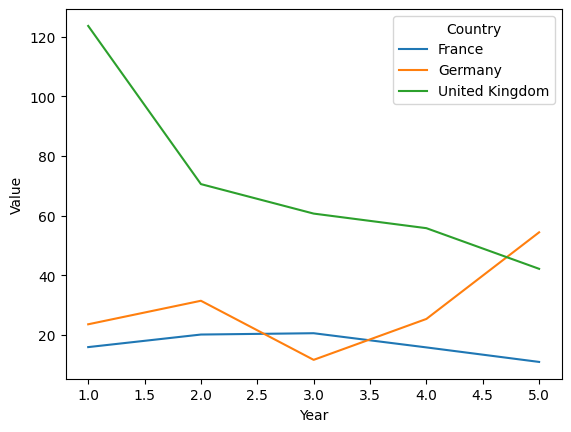

In [ ]:
#lets see France, germany and the UK
france_df = fn_filter_by_country(results_df, 'France')
germany_df = fn_filter_by_country(results_df, 'Germany')
uk_df = fn_filter_by_country(results_df, 'United Kingdom')

graphdf = pd.concat([france_df, germany_df, uk_df])
graphdf_total = fn_filter_by_urclass(graphdf, 'Total')
print(graphdf_total)
sns.lineplot(x='Year', y='Value', hue='Country', data=graphdf_total)


Code to display European availability as a map

Reading Europe geojson data.....


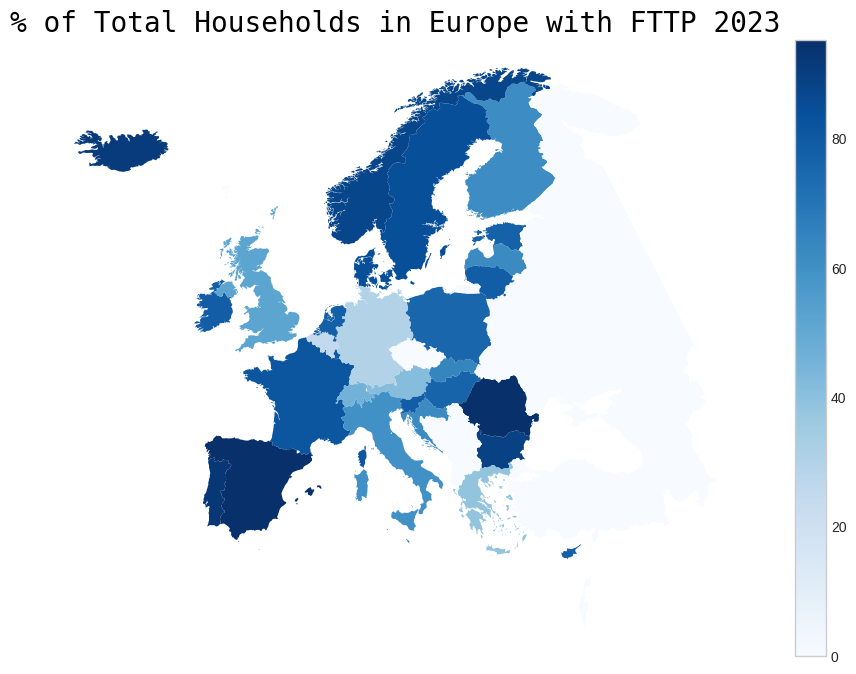

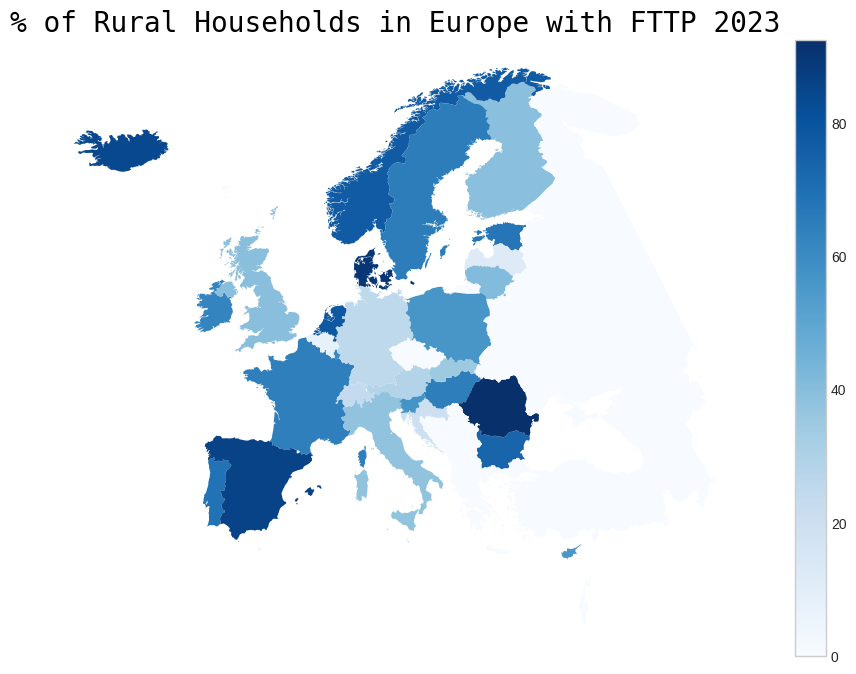

In [ ]:
import geopandas as gpd
#need a new function to filter by Unit

def fn_filter_by_unit(thisdf, thisUnit):
  #return a new dataset which only contains specified unit
  return thisdf.query('Unit_x == "' + thisUnit + '"')

#filter to get total rows only
dfEuropeCleanFTTPTotal = fn_filter_by_urclass(dfEuropeCleanFTTP, 'Total')
dfEuropeCleanFTTPRural = fn_filter_by_urclass(dfEuropeCleanFTTP, 'Rural')
dfEuropeCleanFTTPTotal.head()
dfEuropeCleanFTTPRural.head()
#get only those where Unit = % of Households
dfEuropeCleanFTTPTotalPercentOnly = fn_filter_by_unit(dfEuropeCleanFTTPTotal, '% of Households')
dfEuropeCleanFTTPTotalPercentOnly = dfEuropeCleanFTTPTotalPercentOnly.sort_values(by=['2023%'], ascending=False)

#repeat for rural
#get only those where Unit = % of Households
dfEuropeCleanFTTPRuralPercentOnly = fn_filter_by_unit(dfEuropeCleanFTTPRural, '% of Rural Households')
dfEuropeCleanFTTPRuralPercentOnly = dfEuropeCleanFTTPRuralPercentOnly.sort_values(by=['2023%'], ascending=False)
dfEuropeCleanFTTPRuralPercentOnly.head()

#now combine with geojson file to display as a map
#load the geojson file first
fileEuropegeojson = '/content/drive/MyDrive/Colab/europe.geojson'

#############
# Check we can find the file required, and read it into a pandas dataframe
# show the shape of the dataframe
#############
if os.path.exists(fileEuropegeojson) :
    print("Reading Europe geojson data.....")
    europe = gpd.read_file(fileEuropegeojson)
else:
    raise FileNotFoundError(errno.ENOENT, os.strerror(errno.ENOENT), fileEuropegeojson)



#add in FTTP values
#Total first then rural
europe_cleaned = europe[['NAME', 'geometry']]
df_europe_with_percent_geo_total = europe_cleaned.merge(dfEuropeCleanFTTPTotalPercentOnly, left_on='NAME', right_on='Country', how='left')
df_europe_with_percent_geo_total['2023%'] = df_europe_with_percent_geo_total['2023%'].replace(np.nan, 0)
df_europe_with_percent_geo_total['2022%'] = df_europe_with_percent_geo_total['2023%'].replace(np.nan, 0)
df_europe_with_percent_geo_total['2021%'] = df_europe_with_percent_geo_total['2023%'].replace(np.nan, 0)
df_europe_with_percent_geo_total['2020%'] = df_europe_with_percent_geo_total['2023%'].replace(np.nan, 0)
df_europe_with_percent_geo_total['2019%'] = df_europe_with_percent_geo_total['2019%'].replace(np.nan, 0)

df_europe_with_percent_geo_rural = europe_cleaned.merge(dfEuropeCleanFTTPRuralPercentOnly, left_on='NAME', right_on='Country', how='left')
df_europe_with_percent_geo_rural['2023%'] = df_europe_with_percent_geo_rural['2023%'].replace(np.nan, 0)
df_europe_with_percent_geo_rural['2022%'] = df_europe_with_percent_geo_rural['2023%'].replace(np.nan, 0)
df_europe_with_percent_geo_rural['2021%'] = df_europe_with_percent_geo_rural['2023%'].replace(np.nan, 0)
df_europe_with_percent_geo_rural['2020%'] = df_europe_with_percent_geo_rural['2023%'].replace(np.nan, 0)
df_europe_with_percent_geo_rural['2019%'] = df_europe_with_percent_geo_rural['2019%'].replace(np.nan, 0)


plotdf = df_europe_with_percent_geo_total[['NAME', '2023%','2022%','2021%','2020%','2019%' ,'geometry']]

def fn_plot_graph(thisdf, thisyear, urbanruralstring):

  fig, ax = plt.subplots(1, 1)
  thisdf.plot(column=thisyear, cmap='Blues', ax=ax, legend='full')
  fig.set_size_inches(12,8)
  plt.style.use('seaborn-v0_8-whitegrid')
  font = {'family':'monospace','color':'black','size':20}
  ax.set_title('% of ' + urbanruralstring + ' Households in Europe with FTTP ' + thisyear[0:4], fontdict = font)
  plt.axis('off')
  plt.show()


fn_plot_graph(plotdf, '2023%', 'Total')
#fn_plot_graph(plotdf, '2022%')
#fn_plot_graph(plotdf, '2021%')
#fn_plot_graph(plotdf, '2020%')
#fn_plot_graph(plotdf, '2019%')

plotdf = df_europe_with_percent_geo_rural[['NAME', '2023%','2022%','2021%','2020%','2019%' ,'geometry']]

fn_plot_graph(plotdf, '2023%', 'Rural')
#fn_plot_graph(plotdf, '2022%')
#fn_plot_graph(plotdf, '2021%')
#fn_plot_graph(plotdf, '2020%')
#fn_plot_graph(plotdf, '2019%')


<ipython-input-89-0e0ee2228808>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtereddf['2023NoFTTP'] = round((filtereddf['2023HH']/filtereddf['2023%'])*(100-filtereddf['2023%']),2)
<ipython-input-89-0e0ee2228808>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtereddf.drop(columns=['2023%'], inplace=True)


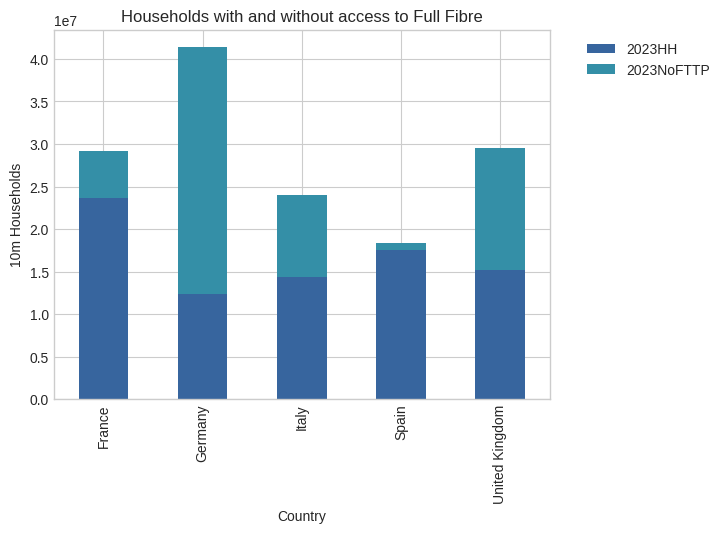

In [ ]:
########
#section to create a graph showing number of households with and without access to FTTP in 5 key EU countries
###########
import seaborn as sns
import matplotlib.pyplot as plt
dfEuropeCleanFTTP.head(100)

def fn_filter_by_urclass(thisdf, thisUrclass):
  #return a new dataset which only contains specified URClass
  return thisdf.query('URClass == "' + thisUrclass + '"')

my_df2 = fn_filter_by_urclass(dfEuropeCleanFTTP, 'Total')
df_france = my_df2.query('Country == "France"')
df_germany = my_df2.query('Country == "Germany"')
df_italy = my_df2.query('Country == "Italy"')
df_spain = my_df2.query('Country == "Spain"')
df_uk = my_df2.query('Country == "United Kingdom"')
my_df = pd.concat([df_france, df_germany,df_italy, df_spain, df_uk])

filtereddf = my_df[['Country', '2023HH', '2023%']]
#caclulate numbers without FTTP
filtereddf['2023NoFTTP'] = round((filtereddf['2023HH']/filtereddf['2023%'])*(100-filtereddf['2023%']),2)
filtereddf.drop(columns=['2023%'], inplace=True)
filtereddf.head()
colors=sns.color_palette('mako')[2:4]

filtereddf.plot(kind='bar', x='Country',stacked=True, color=colors)
# Add Title and Labels, and move the legend to the side
plt.title('Households with and without access to Full Fibre')
plt.ylabel('10m Households')
plt.xlabel('Country')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()